In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
from pyearth import Earth
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as metrics
from scipy.stats import entropy
import math
from pyearth import export
from sympy import *
import copy
import matplotlib.transforms as transforms
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle, PathPatch, Wedge
from matplotlib.collections import PatchCollection
from IPython.core.pylabtools import figsize

In [2]:
data = pd.read_csv('/home/fotis/dev_projects/spark_test/target/crimes_AVG_data/part-cleaned-normalized.csv', sep=",", header=0)
data2 = pd.read_csv('/home/fotis/dev_projects/spark_test/target/crime_results_AVG/gau-x__uni-l_varx-0.01_multimodal-l(0.02_0.04_0.06)_CONNECTED/part-00000', sep=",", header = None)

In [4]:
data.columns = ['ix','x','y','update_in_days']
data2.columns = ['x','y','l','cardinality','average']
data2 = data2[data2['cardinality']>0.12]
data2 = data2.set_index(np.arange(data2.count()[0]))
# fig = plt.figure()
# ax = fig.add_subplot(111)
# data.plot(kind='scatter', x='x',y='y',ax=ax)
# data2.plot(kind='scatter', x='x',y='y', c='r', ax=ax)

2662.33465753
2630.74651225
2662.33465753


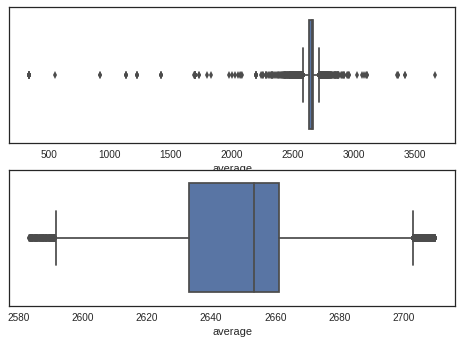

In [6]:
# data['update_in_days'].plot(kind='hist')
Q3 = data2.average.quantile(.75)
Q1 = data2.average.quantile(.25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(Q3)
outlier_point_max = Q3+ 1.5 * IQR
outlier_point_min = Q1-1.5*IQR
fig = plt.figure()
ax = fig.add_subplot(211)
sns.boxplot(data2.average,ax=ax)
data2 = data2[data2.average < outlier_point_max]
data2 = data2[data2.average > outlier_point_min]
ax = fig.add_subplot(212)
sns.boxplot(data2.average,ax=ax)

In [ ]:
fig = plt.figure()
CLOSEST_X = 5
ax = fig.add_subplot(111)
data2.plot(kind='scatter', x='l', y='average', ax=ax)
print(len(subclusters_copy[CLOSEST_X]))
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * len(subclusters_copy[CLOSEST_X]))
for i in range(len(subclusters_copy[CLOSEST_X])):
    sns.regplot(subclusters_copy[CLOSEST_X][i].l,subclusters_copy[CLOSEST_X][i].average, fit_reg=False, ax=ax, marker='x', color=colors[i])
    plt.plot(np.sort(subclusters_copy[CLOSEST_X][i].l), new_models[CLOSEST_X][i][-1].predict(np.sort(subclusters_copy[CLOSEST_X][i].l)), color=colors[i])
    plt.plot(np.linspace(0,1,100), new_models[CLOSEST_X][i][-1].predict(np.linspace(0,1,100)),color=colors[i])
queries = sdf[sdf['closest_x']==5][['x','y','l']].as_matrix()[:5,:]
sub_thetas = 10
for q in queries:
    l_denorm = q[2]*(lmax - lmin) + lmin
    #Create subqueries with smaller thetas starting from 0.01(init point of training) up to theta#
#     if q[2]<0.2:
#         squeries = np.linspace(l_denorm, lmax, sub_thetas) #CHANGED TO 0.02
#     else:
#         squeries = np.linspace(lmin, l_denorm, sub_thetas) #CHANGED TO 0.02
    squeries = np.linspace(lmin, l_denorm, sub_thetas)
    y_Test_a = []
    #Execute thetas and get actual y for stationary query
    distances_for_y = np.sqrt(np.sum(np.power(data_asm[:,:2]-q[:2],2),axis=1))
    for theta in squeries:
        dist_filter = data_asm[distances_for_y < theta]
        if len(dist_filter)==0:
            y_real = 0
        else:
            y_real = np.mean(dist_filter[:,2])
        y_Test_a.append(y_real)
    print(squeries)
    print(y_Test_a)
    ax.plot(squeries, y_Test_a)    


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(cluster_centers[0][0], cluster_centers[0][1],'^')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], '^')

data2.plot(kind='scatter', x='x', y='y', ax=ax)
for i in range(len(subclusters_copy[0])):
    sns.regplot(subclusters_copy[0][i].x,subclusters_copy[0][i].y, fit_reg=False, marker='x', color=colors[i], ax=ax)
sdf[sdf['r2_me']<-1][['x','y','l']].plot(kind='scatter',x='x', y='y',ax=ax,color='k')

In [8]:
min_of_average = data2['average'].min()
max_of_average = data2['average'].max()
xmin = data['x'].min()
xmax = data['x'].max()
ymin = data['y'].min()
ymax = data['y'].max()
lmin = data2['l'].min()
lmax = data2['l'].max()
print("Minimum average : {0}\nMaximum average : {1}".format(min_of_average, max_of_average))
print("Xmin :{0}\nXmax: {1}".format(xmin, xmax))
print("Ymin : {0}\nYmax : {1}".format(ymin, ymax))
print("Lmin : {0}\nLmax : {1}".format(lmin, lmax))

Minimum average : 2583.41231623
Maximum average : 2709.70697133
Xmin :-0.5
Xmax: 0.5
Ymin : -0.5
Ymax : 0.5
Lmin : 0.0200049631688
Lmax : 0.0799982529453


<h2>Normalizing values</h2></br>
$$X_{norma} = \frac{X - min(X)}{max(X) - min(X)}$$

In [9]:
#Normalize all values to (0,1)
data['x'] = (data['x'] - xmin) / (xmax - xmin)
data['y'] = (data['y'] - ymin) / (ymax - ymin)
#Normalize all values for queries to (0,1)
data2['x'] = (data2['x'] - xmin) / (xmax - xmin)
data2['y'] = (data2['y'] - ymin) / (ymax - ymin)
data2['l'] = (data2['l'] - lmin) / (lmax - lmin)
# data2['cardinality'] = (data2['cardinality'] - min_of_cardinality) / (max_of_cardinality - min_of_cardinality)

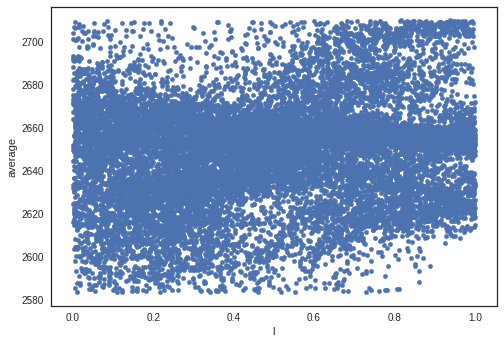

In [67]:
data2.plot(kind='scatter', x='l', y='average')

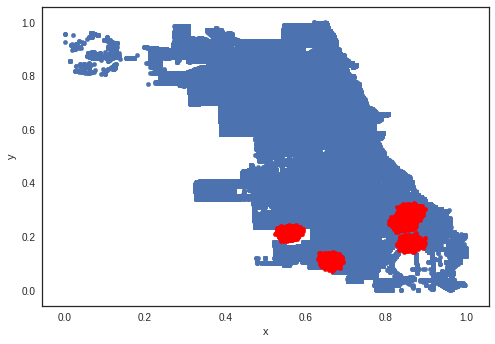

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
data.plot(kind='scatter', x='x',y='y',ax=ax)
data2.plot(kind='scatter', x='x',y='y', c='r', ax=ax)

<h2>Pre-Learning Phase 1st Level Clustering $$\mathbf{x}$$</h2></br>
<b>Cluster and train model for sample 0.2 of queries</b>

In [12]:
prelearningdf = data2.sample(frac=.2)
trainingdf = data2.drop(prelearningdf.index)

In [13]:
print("Resulting prelearning set : {0}\nResulting training set : {1}".format(prelearningdf.count()[0], trainingdf.count()[0]))

Resulting prelearning set : 3578
Resulting training set : 14312


<b>Resetting Indexes</b>

In [14]:
prelearningdf = prelearningdf.set_index(np.arange(prelearningdf.count()[0]))
trainingdf = trainingdf.set_index(np.arange(trainingdf.count()[0]))

In [15]:
testingdf = trainingdf.sample(frac=.2)
trainingdf = trainingdf.drop(testingdf.index)
print("Resulting training set : {0}\nResulting testing set : {1}".format(trainingdf.count()[0], testingdf.count()[0]))
trainingdf = trainingdf.set_index(np.arange(trainingdf.count()[0]))
testingdf = testingdf.set_index(np.arange(testingdf.count()[0]))

Resulting training set : 11450
Resulting testing set : 2862


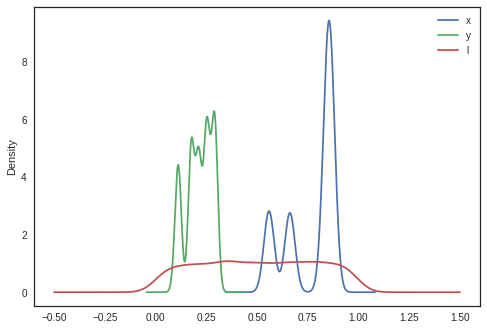

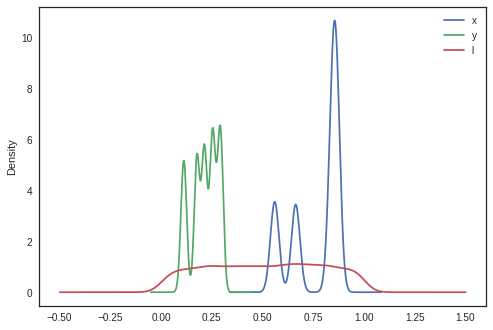

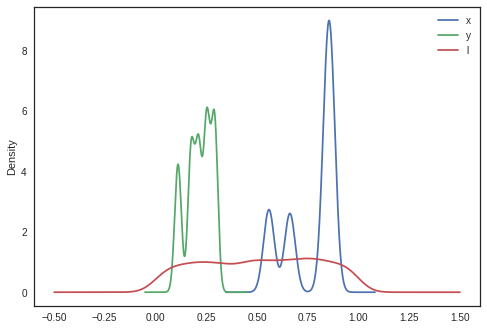

In [16]:
prelearningdf[['x','y','l']].plot(kind='kde')
trainingdf[['x','y','l']].plot(kind='kde')
testingdf[['x','y','l']].plot(kind='kde')

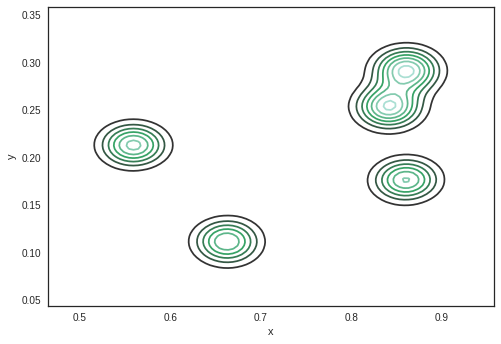

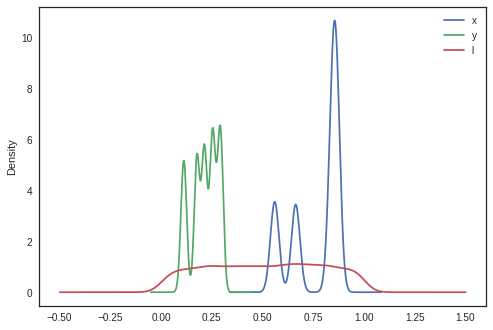

In [17]:
sns.kdeplot(trainingdf['x'], trainingdf['y'])
trainingdf[['x','y','l']].plot(kind='kde')

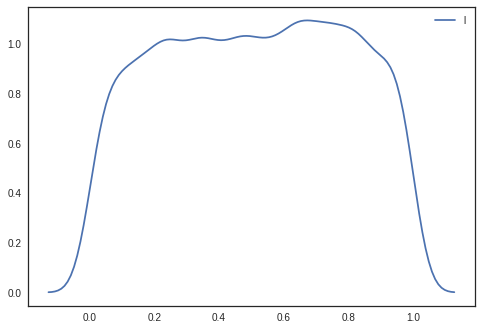

In [18]:
sns.kdeplot(data2['l'])

In [19]:
# prelearningdf['cardinality'] = (prelearningdf['cardinality'] - min_of_cardinality) / (max_of_cardinality - min_of_cardinality)
X = prelearningdf[['x','y']].as_matrix()

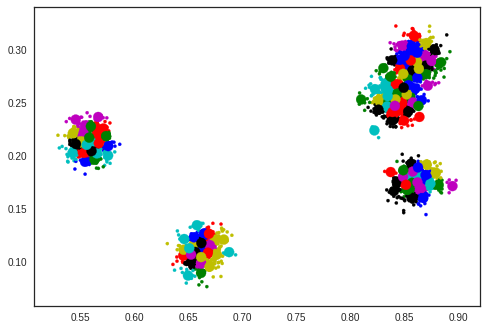

In [73]:
# # Tuning k-parameter for kmeans
vigil = 0.001
avg_vars = []
c=20
# for c in clusters_:
#     var = 0
#     kmeans = MiniBatchKMeans(n_clusters=c, max_no_improvement=None)
#     kmeans.fit(X)
#     avg_vars.append(kmeans.inertia_)
init = True
diff = 1
while diff>= vigil:
    kmeans = MiniBatchKMeans(n_clusters=c, max_no_improvement=None)
    kmeans.fit(X)
    avg_vars.append(kmeans.inertia_)
    if not init:
        diff = (avg_vars[-2]-avg_vars[-1])
    else:
        init=False
    c+=5
c-= 5    
#End of tuning

CLUSTERS =  c
kmeans = MiniBatchKMeans(n_clusters=CLUSTERS)
kmeans.fit(X)
if hasattr(kmeans, 'labels_'):
    y_pred = kmeans.labels_.astype(np.int)
else:
    y_pred = kmeans.predict(X)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * CLUSTERS)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(prelearningdf['x'],prelearningdf['y'],color=colors[y_pred].tolist(), s=10)

if hasattr(kmeans, 'cluster_centers_'):
    centers = kmeans.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

plt.show()

In [74]:
len(kmeans.cluster_centers_)

130

<b>Assigning Queries to clusters</b>

In [75]:
clusters = {}
# fig, axs = plt.subplots(ncols=5, nrows=15,figsize=(30,25))
for i in range(len(kmeans.cluster_centers_)):
    item = np.where(kmeans.labels_== i)
    clusters[i] = prelearningdf.ix[item]
#     sns.regplot(x='l', y='cardinality', data=clusters[i],fit_reg=False, ax=axs[(i/5)][(i%5)])

<b>Checking if cardinality variance is less within cluster than before</b>

In [76]:
#Is the variance lower when clustering ?
t = 0
for i in clusters:
    if clusters[i]['average'].var() < data2['average'].var():
        t+= 1
print("Variance lower when clustering : %d/%d , probability %f" % (t,len(kmeans.cluster_centers_), float(t)/len(kmeans.cluster_centers_)))

Variance lower when clustering : 95/130 , probability 0.730769


In [23]:
# for i in clusters:
#     print("Cluster {0}, variance : {1}".format(i,clusters[i]['cardinality'].var()))

<h2>Pre-Learning 2nd Level cluster $$\theta$$</h2>
<b>Cluster theta</b>

0.0679734390681


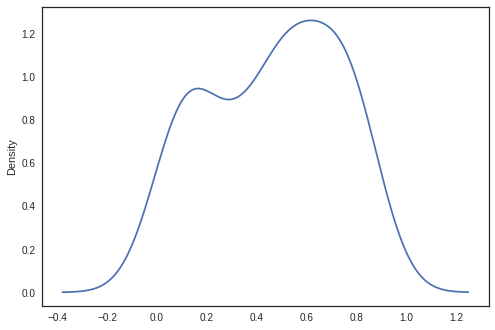

In [77]:
#Showing that within each cluster the distribution of theta is multi-modal and thus needs to be reclustered.
clusters[0]['l'].plot(kind='kde')
print(clusters[0]['l'].var())

In [25]:
# figsize(25,12)
# counts = []
# for c in clusters:
#     counts.append(clusters[c].count()[0])
# sns.barplot(x=range(0, len(counts)), y=counts)

<b>Resetting indexes for each cluster because we need to re-cluster</b>

In [78]:
for i in clusters:
    clusters[i] = clusters[i].set_index(np.arange(clusters[i].count()[0]))

<b>Datastructure to hold each subcluster associated with a cluster</b>

<b>For every cluster, use a subclustering algorithm to cluster based on theta</b>

In [80]:
theta_centers = []
subclusters = []
#For each cluster
for j in clusters:
    T = clusters[j]['l'].as_matrix()
    #Tuning k-parameter for kmeans
    T = T.reshape(-1, 1)
#     avg_vars = []
#     vigil = 0.006
#     avg_vars = []
#     c=1
#     # for c in clusters_:
#     #     var = 0
#     #     kmeans = MiniBatchKMeans(n_clusters=c, max_no_improvement=None)
#     #     kmeans.fit(X)
#     #     avg_vars.append(kmeans.inertia_)
#     init = True
#     diff = 1
#     while diff>= vigil:
#         t_kmeans = MiniBatchKMeans(n_clusters=c, max_no_improvement=None)
#         t_kmeans.fit(T)
#         avg_vars.append(t_kmeans.inertia_)
#         if not init:
#             diff = (avg_vars[-2]-avg_vars[-1])
#         else:
#             init=False
#         c+=1
#     c-= 1    

#     avg_vars = np.array(avg_vars)
#     selected = np.where(avg_vars == np.min(avg_vars))[0][0]
#     plt.plot(range(1,c+1,1), avg_vars)
#     plt.plot(c, avg_vars[selected],'.g')
#     #End of tuning
    subcluster = []
    CLUSTERS = 1#selected
    t_kmeans = MiniBatchKMeans(n_clusters=CLUSTERS)
    t_kmeans.fit(T)
#     if hasattr(t_kmeans, 'labels_'):
#         t_pred = t_kmeans.labels_.astype(np.int)
#     else:
#         t_pred = kmeans.predict(T)
    theta_centers.append(t_kmeans.cluster_centers_)
    for i in range(CLUSTERS):
            item = np.where(t_kmeans.labels_== i)
            s = clusters[j].ix[item]
            subcluster.append(s)
        
    subclusters.append(subcluster)

In [ ]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111, projection='3d')
# markers = ['o','v','x', '+']
# # ax.scatter(clusters[0]['x'],clusters[0]['y'],color=colors[y_pred].tolist(), s=10)
# i=0
# for s in subclusters[0]:
#         ax1.scatter(s['x'].as_matrix(),s['y'].as_matrix(),s['l'].as_matrix(), marker=markers[i])
#         i+=1

In [ ]:
# n_cols = len(subclusters[0])
# fig, axs = plt.subplots(ncols=n_cols, nrows=len(subclusters[:20]),figsize=(30,25))
# sumc = 0
# for i in range(len(subclusters[:20])):
#     for j in range(len(subclusters[i])):
#         cluster = subclusters[i][j]
#         ax=axs[i][0]
#         cluster['l'].plot(kind='kde',ax=ax)
#         print("Cluster {0}/{1} mean is {2}".format(i,j, cluster['l'].mean()*(lmax - lmin) + lmin))

<b>Count for every subcluster and resetting indexes</b>

In [81]:
for i in range(len(subclusters)):
    for j in range(len(subclusters[i])):
#         print("Count for subcluster {0}/{1} : {2}".format(i,j,subclusters[i][j].count()[0]))
        #Reset index trainingdf = trainingdf.set_index(np.arange(trainingdf.count()[0]))
        subclusters[i][j] = subclusters[i][j].set_index(np.arange(subclusters[i][j].count()[0])) 

<b>Creating MARS models (one per SUB-cluster)</b>

In [82]:
#Fit an Earth model for each cluster
# f, axarr = plt.subplots(10, 2,figsize=(35,35))
models = [{} for i in range(len(subclusters))]
r2_avg = 0
rmse_avg = 0
r2_for_model = {}
rmse_for_model = {}
for i in range(len(subclusters)):
    for j in range(len(subclusters[i])):
        tcluster = subclusters[i][j]
        XX = tcluster['l'].as_matrix()
        yy = tcluster['average'].as_matrix()
#         X_train, X_test, y_train, y_test = train_test_split(
#              XX, yy, test_size=0.1, random_state=42)
        model = Earth(max_degree=1)
        model.fit(XX,yy)
        models[i][j] = [model]
        y_hat = model.predict(XX)
        r2 = metrics.r2_score(yy, y_hat)
        rmse = np.sqrt(model.mse_)
        r2_for_model[i] = r2
        rmse_for_model[i] = rmse
        r2_avg+=r2
        rmse_avg+=rmse
#         print("Model for cluster {0} subcluster {4}, R2 : {1}, RMSE :{2}, Size of Sample : {3}".format(i,r2,rmse,tcluster.count()[0],j))

In [ ]:
# n_cols = len(subclusters[0])
# fig, axs = plt.subplots(ncols=n_cols, nrows=len(subclusters[:30]),figsize=(30,25))
# sumc = 0
# for i in range(len(subclusters[:30])):
#     for j in range(len(subclusters[i])):
#         cluster = subclusters[i][j]
#         sumc+= cluster.count()[0]
#         ax=axs[i][j]
#         sns.regplot(x='l', y='average', data=cluster,fit_reg=False, ax=ax)
#         ax.plot(np.sort(cluster['l']), models[i][j][0].predict(np.sort(cluster['l'].as_matrix())), 'g')

In [ ]:
# n_cols = len(subclusters[0])
# fig, axs = plt.subplots(ncols=n_cols, nrows=len(subclusters),figsize=(30,25))
# sumc = 0
# for i in range(len(subclusters)):
#     for j in range(len(subclusters[i])):
#         cluster = subclusters[i][j]
#         sumc+= cluster.count()[0]
#         ax=axs[i][0]
#         sns.regplot(x='l', y='cardinality', data=cluster,fit_reg=False, ax=ax)
#         ax.plot(cluster['l'], models[i][j][0].predict(cluster['l'].as_matrix()), '.g')

In [83]:
#PROBELMATIC len of sublcusters might not be the same for each subcluster
print("Average R2 : %f" % (r2_avg/(len(subclusters*len(subclusters[0])))))
print("Average RMSE : %f" % (rmse_avg/(len(subclusters*len(subclusters[0])))))

Average R2 : 0.556137
Average RMSE : 10.029491


<h2>Training phase</h2>

In [84]:
online = trainingdf[['x','y','l','average']].as_matrix()

<h3>Switch Between Scenarios</h3>

In [85]:
selected_scenario = 2

<b>Scenario 2</b>
- Go to closest clusterhead 
$$w_k = argmin_k \lVert \mathbf{w}_k - \mathbf{x'} \rVert $$ 
- Go to theta clusterhead with the miunimum prediction error and distance from query's theta. <b>Lambda</b> is a tunable parameter
$$\theta_{k,j} = argmin_j  \lambda(\theta'-\theta_{k,j})^2 + (1-\lambda)(\hat{y_{k,j}} - y')^2$$

In [86]:
if selected_scenario == 2:
    print("Executing Scenario 2")
    #Reset cluster centers as well
    ALPHA = 0.01
    LAMBDA = 0.5
    subclusters_copy = copy.deepcopy(subclusters)
    theta_centers_copy = copy.deepcopy(theta_centers) #theta positions (multiple for each clusterhead)
    cluster_centers = copy.copy(kmeans.cluster_centers_) # x posistions of clusterheads
    new_models = copy.deepcopy(models)
    n_s = 20
    t = 1 # every 20 , retrain ONLY affected MARS models
    affected = [] #Keep a list of affected models to retrain only them
    keys = ['x','y','l','average']
    side_experiment_counter = 0
    side_experiment_2 = 0
    side_experiment_3 = 0
    for q in online:
        dist = np.linalg.norm(cluster_centers - q[:2],axis=1) #Calculate distances between all neurons
        closest_x = np.argmin(dist)
        #Scenario 2 Go to closest X and then to theta with lowest error
        dist_t = ((theta_centers_copy[closest_x]-q[2])**2).T
        preds = []
        for m in new_models[closest_x]:
            preds.append(float(new_models[closest_x][m][-1].predict([q[2]])))
    #     preds = [float(new_models[m][-1].predict([q[2]])) for m in new_models] #Prediction for each latest model
        preds = np.array(preds)
        errors = np.sqrt((preds-q[3])**2) #Error between prediction and each model (y-y_hat)**2
        #Normalize errors
        errors = (errors-0) / (max_of_average-0)

        total_distance = LAMBDA*dist_t +  (1-LAMBDA)*errors # Distance from x  + distance from theta cluster
        

        closest_t = np.argmin(total_distance)
#         print(closest_t)
        closest = (closest_x, closest_t)
        #Side experiment : number of times closest distance wise gives smallest prediction error
        distwise = np.argmin(dist_t)
        errorwise = np.argmin(errors)
        side_experiment_counter+= distwise==errorwise
        side_experiment_2 += distwise==closest_t
        side_experiment_3 += errorwise==closest_t and errorwise!=distwise
        #Adding to cluster
        dictionarize = dict(zip(keys, q.T))
        subclusters_copy[closest[0]][closest[1]] = subclusters_copy[closest[0]][closest[1]].append(dictionarize, 
                                                                                                   ignore_index=True)
        #Readjust theta
        theta_centers_copy[closest[0]][closest[1]] += ALPHA*(q[2] - theta_centers_copy[closest[0]][closest[1]])
        #Retraining every n_s steps
        affected.append(closest)
        if (t%n_s)==0:
            for tpl in set(affected):
                model = Earth(max_degree=1)
                xtrain_o = subclusters_copy[tpl[0]][tpl[1]]['l'].as_matrix()
                ytrain_o = subclusters_copy[tpl[0]][tpl[1]]['average'].as_matrix()
                m = model.fit(xtrain_o, ytrain_o)
                new_models[tpl[0]][tpl[1]].append(m) #Append a new model
            affected = []
        t+=1

Executing Scenario 2


In [87]:
#Side experiment results
print(side_experiment_counter)
print("Probability closest distance wise thetaclusterhead having the smallest error {0}".format(float(side_experiment_counter) /len(online)))
print("Times prediction error won {0}".format(1.0*side_experiment_3/len(online)))
print("Times distance error won {0}".format(1.0*side_experiment_2/len(online)))

11450
Probability closest distance wise thetaclusterhead having the smallest error 1.0
Times prediction error won 0.0
Times distance error won 1.0


In [89]:
# n_cols = len(subclusters[0])
# fig, axs = plt.subplots(ncols=n_cols, nrows=len(subclusters[:30]),figsize=(30,25))
# sumc = 0
# for i in range(len(subclusters_copy[:30])):
#     for j in range(len(subclusters_copy[i])):
#         cluster = subclusters_copy[i][j]
#         sumc+= cluster.count()[0]
#         ax=axs[i][j]
#         sns.regplot(x='l', y='average', data=cluster,fit_reg=False, ax=ax)
#         ax.plot(np.sort(cluster['l']), new_models[i][j][-1].predict(np.sort(subclusters_copy[i][j]['l'].as_matrix())), 'g')

<h2>Evaluation of advanced clustering algorithm on prediction</h2>

In [49]:
onlinetest = testingdf.as_matrix()

In [90]:
y_pred = []
y_actual = onlinetest[:,4]
for q in onlinetest:
    dist = np.linalg.norm(cluster_centers - q[:2],axis=1) #Calculate distances between all neurons
    closest_x = np.argmin(dist)
    dist_t = (theta_centers_copy[closest_x]-q[2])**2
    closest_t = np.argmin(dist_t)
    y_hat = new_models[closest_x][closest_t][-1].predict([q[2]])
    y_pred.append(y_hat[0])
y_pred = np.array(y_pred)
print("R2 : {0}\nMSE: {1}".format(metrics.r2_score(y_actual, y_pred), np.sqrt(metrics.mean_squared_error(y_actual, y_pred))))

R2 : 0.808445651011
MSE: 10.3830341768


In [51]:
qs = testingdf[['x','y','l']].as_matrix()
data_asm = data[['x','y','update_in_days']].as_matrix()

In [52]:
y_Tests = []
sub_thetas = 10
for q in qs:
    l_denorm = q[2]*(lmax - lmin) + lmin
    #Create subqueries with smaller thetas starting from 0.01(init point of training) up to theta#
#     if q[2]<0.2:
#         squeries = np.linspace(l_denorm, lmax, sub_thetas) #CHANGED TO 0.02
#     else:
#         squeries = np.linspace(lmin, l_denorm, sub_thetas) #CHANGED TO 0.02
    squeries = np.linspace(lmin, l_denorm, sub_thetas)
    y_Test_a = []
    #Execute thetas and get actual y for stationary query
    distances_for_y = np.sqrt(np.sum(np.power(data_asm[:,:2]-q[:2],2),axis=1))
    for theta in squeries:
        dist_filter = data_asm[distances_for_y < theta]
        if len(dist_filter)==0:
            y_real = 0
        else:
            y_real = np.mean(dist_filter[:,2])
        y_Test_a.append(y_real)
    y_Test_a = np.array(y_Test_a)
    y_Tests.append(y_Test_a)

<b>Does choosing a model from a different timeline yield better results </b>

<h2>Begining evaluation on explanations</h2>

In [91]:
import time

avg_r2_me = 0
avg_r2_god = 0
avg_r2_knn = 0
avg_kl = 0
avg_r2_new = 0
probs = []
avg_relative_error = 0
record_times_closest = 0
sub_thetas = 10
query_index = 0 
#For all queries in testingdf
for q in qs:
    #Get closest clusters
    dist = np.linalg.norm(cluster_centers - q[:2],axis=1) #Calculate distances between all neurons
    closest_x = np.argmin(dist)
    dist_t = (theta_centers_copy[closest_x]-q[2])**2

    #First denormalize theta 
    y_Test_a = y_Tests[query_index]
#     y_Test_a = (y_Test_a - min_of_cardinality) / (max_of_cardinality - min_of_cardinality)
    l_denorm = q[2]*(lmax - lmin) + lmin

    squeries = np.linspace(lmin, l_denorm, sub_thetas) #CHANGED TO 0.02
    #Normalize squeries
    squeries = (squeries - lmin) / (lmax - lmin)
    #Create PLR for GOD
    model_god = Earth(max_degree=1, penalty=0, enable_pruning=False, max_terms=sub_thetas)
    model_god.fit(squeries, y_Test_a)
    god_predi = model_god.predict(squeries)
#     print(model_god.summary())
    #Create subqueries to be executed
    #Each query is executed from the same position but with a lesser theta
    mqueries = np.matrix([q] * sub_thetas)
    qqs = squeries.reshape((sub_thetas,1))
    mqueries[:,2] = 0
    mqueries[:,2] = qqs  
    #ME MARS MODEL
    #Change of strategy get closest model for each lesser theta.
    y_predi_c = []
    start_time = time.time()
    closests = []
    for theta in squeries:
        dist_t = (theta_centers_copy[closest_x]-theta)**2
        closest_t = np.argmin(dist_t)
        closests.append(closest_t)
        prediction = float(new_models[closest_x][closest_t][-1].predict([theta]))
        if prediction>0:
            y_predi_c.append(prediction)
        else:
            y_predi_c.append(0)
    t_of_execution_me = time.time() - start_time
    

    y_predi_c = np.array(y_predi_c)
#     y_predi_c = new_models[closest_x][closest_t][-1].predict(squeries)
#     y_predi_c[np.where(y_predi_c < 0)] = y_predi_c[np.where(y_predi_c < 0)] * -1 * 0
#     y_predi_c = y_predi_c*(max_of_cardinality - min_of_cardinality) + min_of_cardinality


    

    
    #knn  
    i = 0
    start_time = time.time()
    lr = LinearRegression()
    lr.fit(squeries.reshape(-1,1), y_Test_a)  
    knn_predi = lr.predict(squeries.reshape(-1,1))

    t_of_execution_knn = time.time() - start_time
    

    #Evaluation Scores
    coefs_me = []
    coefs_g = []
    coefs_a = []
    coefs_l = []
    #Slope of god
    for i in range(1,len(god_predi[1:])):
        #Slope
        paronomastis = squeries[i] - squeries[i-1]
        arithmitis = y_Test_a[i] - y_Test_a[i-1]
        #Predicted_slope
        arithmitis_me = y_predi_c[i] - y_predi_c[i-1]
        arithmitis_knn = knn_predi[i] - knn_predi[i-1]
        arithmitis_g = god_predi[i] - god_predi[i-1]
        v = arithmitis/paronomastis
        coefs_a.append(v)
        vapprox_m = arithmitis_me/paronomastis
        coefs_me.append(vapprox_m)
        vapprox_knn = arithmitis_knn/paronomastis
        coefs_l.append(vapprox_knn)
        vapprox_g = arithmitis_g/paronomastis
        coefs_g.append(vapprox_g)        

    
    coefs_me = np.array(coefs_me).reshape(1,-1)
    coefs_g = np.array(coefs_g).reshape(1,-1)
    coefs_a = np.array(coefs_a).reshape(1,-1)
    coefs_l = np.array(coefs_l).reshape(1,-1)
    #Cosine Similarity between coefficients
    cos_coef_m = float(metrics.pairwise.cosine_similarity(coefs_me, coefs_a))
    cos_coef_g = float(metrics.pairwise.cosine_similarity(coefs_g, coefs_a))
    cos_coef_l = float(metrics.pairwise.cosine_similarity(coefs_l, coefs_a))

    #KL-divergence metric
    #Transforming to probabilties
    p_actual = np.histogram(y_Test_a)[0]/10.0
    p_me = np.histogram(y_predi_c)[0]/10.0
    p_g = np.histogram(god_predi)[0]/10.0
    p_lin = np.histogram(knn_predi)[0]/10.0
    
    mask_me = np.where(p_me!=0)
    mask_g = np.where(p_g!=0)
    mask_l = np.where(p_lin!=0)

    kl_divergence = entropy(p_actual[mask_me], p_me[mask_me])
    kl_div_g = entropy(p_actual[mask_g], p_g[mask_g])
    kl_div_knn = entropy(p_actual[mask_l], p_lin[mask_l])
    entropy_p = entropy(p_actual)
    scaler = 1.0/entropy_p
    
    #R2 scores
    knn_r2_score = metrics.r2_score(y_Test_a, knn_predi )
    me_r2_score = metrics.r2_score(y_Test_a, y_predi_c)
    god_r2_score = metrics.r2_score(y_Test_a, god_predi)
    
    new_metric_m = 1 - ((np.sum(np.abs(y_Test_a - y_predi_c)))/(np.sum(np.abs(y_Test_a - np.mean(y_Test_a)))))
    new_metric_g = 1 - ((np.sum(np.abs(y_Test_a - god_predi)))/(np.sum(np.abs(y_Test_a - np.mean(y_Test_a)))))
    new_metric_knn = 1 - ((np.sum(np.abs(y_Test_a - knn_predi)))/(np.sum(np.abs(y_Test_a - np.mean(y_Test_a)))))
    
    #Averages
    avg_kl += kl_divergence
    avg_r2_knn += knn_r2_score
    avg_r2_me += me_r2_score
    avg_r2_god += god_r2_score
    avg_r2_new+=new_metric_m
    probs.append([closest_x, closest_t, me_r2_score, god_r2_score, knn_r2_score, 
                  new_metric_m, new_metric_g, new_metric_knn,
                  cos_coef_m, cos_coef_g, cos_coef_l,
                  kl_divergence, kl_div_g, kl_div_knn,entropy_p, scaler,
                  t_of_execution_me, t_of_execution_knn, q[0], q[1], q[2], np.var(y_Test_a)])
    query_index+=1


/home/fotis/.local/lib/python2.7/site-packages/ipykernel/__main__.py:123: RuntimeWarning: divide by zero encountered in double_scalars


In [92]:
sdf = pd.DataFrame(data=np.array(probs), index=range(len(probs)), columns=['closest_x','closest_t','r2_me','r2_god','r2_knn',
                                                                           'new_metric_m','new_metric_g', 'new_metric_knn',
                                                                           'cos_coef_m','cos_coef_g', 'cos_coef_l',
                                                                           'kl_me','kl_g','kl_knn',
                                                                           'entropy_p','scaler'
                                                                           ,'time_me','time_knn',
                                                                           'x','y','l', 'variance'])

In [ ]:
sdf.to_csv(path_or_buf='/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_gau_uni-AVG-Crimes.csv')

In [ ]:
sdf = sdf.replace([np.inf, -np.inf], np.nan).dropna()

In [93]:
sdf.median()

closest_x          68.000000
closest_t           0.000000
r2_me               0.214360
r2_god              0.416287
r2_knn              0.416287
new_metric_m        0.301559
new_metric_g        0.222336
new_metric_knn      0.222336
cos_coef_m          0.425978
cos_coef_g          0.313170
cos_coef_l          0.313170
kl_me               0.528582
kl_g                0.606843
kl_knn              0.606843
entropy_p           1.695743
scaler              0.589712
time_me             0.000911
time_knn            0.000239
x                   0.843617
y                   0.218462
l                   0.518959
variance          281.880073
dtype: float64

0.587002136968
-0.435020679523
0.587002136968


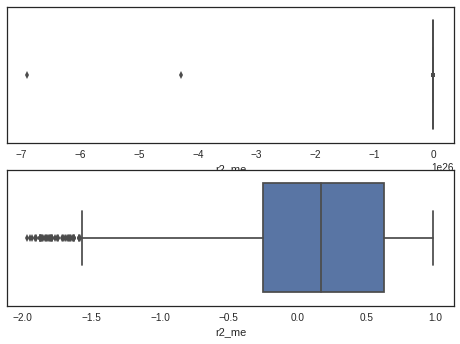

In [64]:
# data['update_in_days'].plot(kind='hist')
Q3 = sdf.r2_me.quantile(.75)
Q1 = sdf.r2_me.quantile(.25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(Q3)
outlier_point_max = Q3+ 1.5 * IQR
outlier_point_min = Q1-1.5*IQR
fig = plt.figure()
ax = fig.add_subplot(211)
sns.boxplot(sdf.r2_me,ax=ax)
sdf = sdf[sdf.r2_me < outlier_point_max]
sdf = sdf[sdf.r2_me > outlier_point_min]
ax = fig.add_subplot(212)
sns.boxplot(sdf.r2_me,ax=ax)

In [ ]:
sdf['average'] = testingdf['average']